# Testing `calc_rsq()`

We're getting weird results from our iterations, so let's see what's going on. I'm going to run through this code in python2 and python3.

In [1]:
import sys
print (sys.version)

2.7.12 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def exclude_nan(x,y):
    """
    Exclude NaN values if either entry in a pair of vectors has NaN
    """
    idx = np.logical_not(np.logical_or(np.isnan(x), np.isnan(y)))
    x = x[idx]
    y = y[idx]
    n = len(x)
    return [x, y, n]

def compute_icc(av_corr_mat_A, av_corr_mat_B):
    """
    This function computes the inter-class correlation (ICC) of the
    two classes represented by the x and y numpy vectors.
    """

    inds = np.triu_indices_from(av_corr_mat_B, k=1)
    x = av_corr_mat_A[inds]
    y = av_corr_mat_B[inds]
    
    if all(x == y):
        return 1

    [x, y, n] = exclude_nan(x,y)

    ## Need at least 3 data points to compute this
    if n < 3:
        return np.nan

    Sx = sum(x); Sy = sum(y);
    Sxx = sum(x*x); Sxy = sum( (x+y)**2 )/2; Syy = sum(y*y)

    fact = ((Sx + Sy)**2)/(n*2)
    SS_tot = Sxx + Syy - fact
    SS_among = Sxy - fact
    SS_error = SS_tot - SS_among

    MS_error = SS_error/n
    MS_among = SS_among/(n-1)
    ICC = (MS_among - MS_error) / (MS_among + MS_error)

    return ICC

In [4]:
def calc_rsq(av_corr_mat_A, av_corr_mat_B):
    """
    From wikipedia: https://en.wikipedia.org/wiki/Coefficient_of_determination
    
    Rsq = 1 - (SSres / SStot)
    
    SSres is calculated as the sum of square errors (where the error
    is the difference between x and y).
    
    SStot is calculated as the total sum of squares in y.
    """
    # Get the data we need
    inds = np.triu_indices_from(av_corr_mat_B, k=1)
    x = av_corr_mat_A[inds]
    y = av_corr_mat_B[inds]
    
    # Calculate the error/residuals
    res = y - x

    SSres = np.sum(res**2)
    
    # Sum up the total error in y
    y_var = y - np.mean(y)
    
    SStot = np.sum(y_var**2)
    
    # R squared
    Rsq = 1 - (SSres/SStot)
    
    return Rsq

## Generate random correlation matrices

In [5]:
df1 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df2 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df1corrmat = df1.corr()
df2corrmat = df2.corr()

In [6]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.444114,0.844154,1.031781,0.376350,-0.268573,2.290311,0.684376,-0.503164,-1.009470,2.768265,0.666130,-0.015259,0.355084,0.219647,-0.173205,0.847310,0.498809,-0.571674,0.773316,1.534371
1,0.457840,0.139373,-0.202563,0.113406,0.279071,1.769582,-1.649702,-0.212968,1.864539,-0.217874,-0.142597,0.753397,-0.317901,-0.005718,0.275085,0.311312,-2.000284,0.453912,1.070533,-0.447618
2,0.047585,-1.207379,-0.565206,-0.535190,-0.176077,-0.539329,0.580580,0.235743,0.307732,1.476505,-1.319733,0.058243,0.981105,0.421086,0.176531,1.543408,-0.680744,-1.439494,-0.848772,1.063280
3,0.162702,0.503402,0.217670,-0.915654,0.596231,0.974729,1.289923,1.017891,-0.001535,0.576109,0.209358,0.238143,-0.943891,-0.347073,-1.820078,-0.276774,-0.986598,1.847088,0.930309,0.545403
4,-1.347574,0.405821,0.349136,-0.153161,-1.579939,0.576506,-1.065348,0.307933,1.016329,0.107181,0.634566,-0.157933,-0.155476,0.113186,1.663244,-0.857417,0.597048,-1.430178,-0.527063,0.418088


In [7]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.083801,0.149613,0.877601,-2.137419,-1.768953,1.286384,1.142209,1.276705,0.002112,-0.525866,-0.344436,-0.205705,1.259308,0.386699,-0.778967,0.677658,-1.278328,0.538226,-1.260022,0.545105
1,0.133374,1.052047,-0.629535,0.678181,-1.504380,-0.669312,-1.695258,-0.078268,0.033898,-0.872361,0.093987,1.254013,-0.069991,-1.763762,1.669817,-1.115142,-0.879403,-0.821561,0.163353,-1.144346
2,-0.031149,-1.249928,0.461114,-1.160924,-0.112922,0.475364,0.529824,-0.324259,0.489752,0.224793,0.560204,-0.627849,0.807536,0.847696,-1.213841,0.933936,-0.616322,0.353824,-0.259600,-1.406618
3,0.541372,0.373412,1.569616,-1.957513,-0.453666,-0.023946,0.763799,0.005277,0.880381,-1.396150,0.370457,1.732663,0.875328,-0.179329,0.239308,0.084353,-1.080673,-1.403557,1.326070,-0.978176
4,0.891588,2.282608,1.710303,-0.119327,-0.326607,0.630757,-0.932145,-0.108901,1.367934,1.732427,-0.278402,1.849950,0.831386,0.717822,-1.609981,-0.117149,1.458039,-0.382650,0.656672,0.722917


In [8]:
df1corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.011532,-0.092718,0.026356,-0.089743,0.047921,0.185035,-0.184827,-0.072763,0.119838,0.228628,-0.220259,-0.031612,0.056286,-0.134530,0.009155,-0.014753,-0.030125,0.134731,-0.146445
1,0.011532,1.000000,0.068180,0.022443,0.052534,0.063645,-0.018350,0.084287,0.011739,-0.052226,0.031170,-0.006613,0.008388,0.096513,0.082465,-0.063945,0.113320,-0.000941,-0.004568,-0.022071
2,-0.092718,0.068180,1.000000,0.023703,0.035239,-0.020487,0.111740,0.024748,-0.007348,0.201983,0.070750,-0.034207,-0.005572,-0.066358,-0.013168,-0.023432,0.010129,-0.054968,-0.146588,-0.052713
3,0.026356,0.022443,0.023703,1.000000,-0.169385,0.070282,0.025510,0.095950,-0.034997,0.055654,-0.051827,-0.131437,0.067084,-0.031725,0.125489,-0.002377,0.072887,-0.105375,0.029951,-0.112901
4,-0.089743,0.052534,0.035239,-0.169385,1.000000,0.016106,0.093413,-0.057077,0.151740,0.063081,-0.011494,0.010989,-0.090415,-0.241009,-0.070583,0.053286,0.009037,0.043645,-0.054476,-0.042547


In [9]:
df2corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.039546,-0.040959,0.027378,-0.030509,-0.007276,-0.030775,0.143966,-0.069188,-0.084455,-0.049173,-0.087619,0.075790,0.096308,-0.114254,-0.030044,-0.098078,-0.179199,0.046191,-0.041341
1,0.039546,1.000000,0.123753,-0.170103,-0.042846,0.010979,-0.071826,0.221010,0.063808,0.150936,-0.065731,0.229388,0.071841,0.130748,-0.082213,0.070014,0.114207,0.034085,0.181866,-0.088935
2,-0.040959,0.123753,1.000000,-0.122686,-0.045506,0.078886,-0.065929,-0.007729,0.031759,-0.007616,-0.000923,0.089715,0.133912,0.115311,-0.012068,0.061833,-0.035932,-0.027265,0.146759,0.113438
3,0.027378,-0.170103,-0.122686,1.000000,-0.013043,0.022877,0.103108,0.206895,0.011160,-0.190548,-0.112184,-0.074469,-0.102411,-0.103469,0.102009,-0.049588,-0.009885,0.051968,-0.052130,0.150177
4,-0.030509,-0.042846,-0.045506,-0.013043,1.000000,0.123600,0.093216,0.081747,0.021859,-0.000659,0.072042,-0.003934,-0.151096,-0.001176,-0.088446,0.198554,0.228289,-0.011977,0.062370,0.008484


## Calculate $R^2$ from random matrices

In [10]:
calc_rsq(df1.corr().as_matrix(), df2.corr().as_matrix())

-0.83114626701243122

Now let's walk through the code above to see what it's doing.

In [11]:
inds = np.triu_indices_from( df2.corr().as_matrix(), k=1)
inds

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13,
        13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16,
        17, 17, 18]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14

In [12]:
x =  df1.corr().as_matrix()[inds]
y =  df2.corr().as_matrix()[inds]

In [13]:
print(str(df1.corr().shape) + " matrix gives an upper triangle with length " + str((20*(20-1))/2))

(20, 20) matrix gives an upper triangle with length 190


`df.corr()` is a $20\times 20$ matrix, so getting the upper triangle should give us $\frac{20\cdot (20-1)}{2}=190$ cells in the upper triangle.

In [14]:
len(x)

190

Yay, we get what we expect!

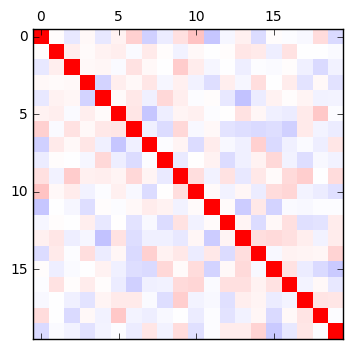

In [15]:
plt.matshow(df1.corr(), vmin=-1, vmax=1, cmap='bwr')

In [16]:
df1.corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.00,0.01,-0.09,0.03,-0.09,0.05,0.19,-0.18,-0.07,0.12,0.23,-0.22,-0.03,0.06,-0.13,0.01,-0.01,-0.03,0.13,-0.15
1,0.01,1.00,0.07,0.02,0.05,0.06,-0.02,0.08,0.01,-0.05,0.03,-0.01,0.01,0.10,0.08,-0.06,0.11,-0.00,-0.00,-0.02
2,-0.09,0.07,1.00,0.02,0.04,-0.02,0.11,0.02,-0.01,0.20,0.07,-0.03,-0.01,-0.07,-0.01,-0.02,0.01,-0.05,-0.15,-0.05
3,0.03,0.02,0.02,1.00,-0.17,0.07,0.03,0.10,-0.03,0.06,-0.05,-0.13,0.07,-0.03,0.13,-0.00,0.07,-0.11,0.03,-0.11
4,-0.09,0.05,0.04,-0.17,1.00,0.02,0.09,-0.06,0.15,0.06,-0.01,0.01,-0.09,-0.24,-0.07,0.05,0.01,0.04,-0.05,-0.04
5,0.05,0.06,-0.02,0.07,0.02,1.00,0.10,-0.22,-0.07,0.05,0.06,-0.01,0.00,0.11,0.04,-0.06,-0.07,0.08,0.22,-0.02
6,0.19,-0.02,0.11,0.03,0.09,0.10,1.00,-0.06,-0.13,0.16,-0.03,0.03,-0.10,-0.13,-0.15,-0.13,-0.18,0.08,-0.05,-0.07
7,-0.18,0.08,0.02,0.10,-0.06,-0.22,-0.06,1.00,-0.01,0.04,-0.14,0.07,-0.03,-0.06,0.19,-0.14,-0.06,-0.02,-0.07,0.10
8,-0.07,0.01,-0.01,-0.03,0.15,-0.07,-0.13,-0.01,1.00,-0.08,0.00,0.05,-0.13,-0.06,0.05,0.15,-0.05,-0.13,-0.03,-0.05
9,0.12,-0.05,0.20,0.06,0.06,0.05,0.16,0.04,-0.08,1.00,0.13,-0.05,0.11,-0.09,0.09,0.02,0.15,0.20,-0.01,0.14


In [17]:
x.round(2)

array([ 0.01, -0.09,  0.03, -0.09,  0.05,  0.19, -0.18, -0.07,  0.12,
        0.23, -0.22, -0.03,  0.06, -0.13,  0.01, -0.01, -0.03,  0.13,
       -0.15,  0.07,  0.02,  0.05,  0.06, -0.02,  0.08,  0.01, -0.05,
        0.03, -0.01,  0.01,  0.1 ,  0.08, -0.06,  0.11, -0.  , -0.  ,
       -0.02,  0.02,  0.04, -0.02,  0.11,  0.02, -0.01,  0.2 ,  0.07,
       -0.03, -0.01, -0.07, -0.01, -0.02,  0.01, -0.05, -0.15, -0.05,
       -0.17,  0.07,  0.03,  0.1 , -0.03,  0.06, -0.05, -0.13,  0.07,
       -0.03,  0.13, -0.  ,  0.07, -0.11,  0.03, -0.11,  0.02,  0.09,
       -0.06,  0.15,  0.06, -0.01,  0.01, -0.09, -0.24, -0.07,  0.05,
        0.01,  0.04, -0.05, -0.04,  0.1 , -0.22, -0.07,  0.05,  0.06,
       -0.01,  0.  ,  0.11,  0.04, -0.06, -0.07,  0.08,  0.22, -0.02,
       -0.06, -0.13,  0.16, -0.03,  0.03, -0.1 , -0.13, -0.15, -0.13,
       -0.18,  0.08, -0.05, -0.07, -0.01,  0.04, -0.14,  0.07, -0.03,
       -0.06,  0.19, -0.14, -0.06, -0.02, -0.07,  0.1 , -0.08,  0.  ,
        0.05, -0.13,

These also match, so that's good. Time to walk through the $R^2$ calculation.

In [18]:
res = y - x
res

array([  2.80146372e-02,   5.17595894e-02,   1.02205285e-03,
         5.92345243e-02,  -5.51970600e-02,  -2.15810043e-01,
         3.28792381e-01,   3.57535283e-03,  -2.04292220e-01,
        -2.77800632e-01,   1.32639097e-01,   1.07402824e-01,
         4.00221182e-02,   2.02762860e-02,  -3.91983199e-02,
        -8.33252620e-02,  -1.49074233e-01,  -8.85401409e-02,
         1.05103936e-01,   5.55735726e-02,  -1.92546731e-01,
        -9.53793738e-02,  -5.26656249e-02,  -5.34752826e-02,
         1.36722467e-01,   5.20691443e-02,   2.03162165e-01,
        -9.69011490e-02,   2.36000603e-01,   6.34530837e-02,
         3.42351147e-02,  -1.64678818e-01,   1.33958416e-01,
         8.87449860e-04,   3.50255033e-02,   1.86434191e-01,
        -6.68637614e-02,  -1.46388441e-01,  -8.07447116e-02,
         9.93735083e-02,  -1.77669577e-01,  -3.24771470e-02,
         3.91073470e-02,  -2.09599144e-01,  -7.16729006e-02,
         1.23921864e-01,   1.39484082e-01,   1.81669611e-01,
         1.10007354e-03,

In [19]:
SSres = np.sum(res**2)
SSres

3.5402070603555513

In [20]:
# Sum up the total error in y
y_var = y - np.mean(y)
y_var

array([ 0.02019321, -0.06031217,  0.00802518, -0.04986204, -0.02662931,
       -0.05012791,  0.1246123 , -0.08854128, -0.10380793, -0.06852615,
       -0.10697276,  0.05643712,  0.07695471, -0.13360743, -0.04939695,
       -0.11743106, -0.19855209,  0.02683761, -0.06069416,  0.10440017,
       -0.18945657, -0.06219884, -0.00837389, -0.09117895,  0.20165627,
        0.04445487,  0.13158262, -0.08508458,  0.21003475,  0.05248767,
        0.11139514, -0.10156661,  0.05066033,  0.09485384,  0.01473153,
        0.16251247, -0.10828796, -0.14203898, -0.06485911,  0.05953295,
       -0.08528254, -0.02708242,  0.01240608, -0.02696936, -0.02027646,
        0.07036173,  0.11455856,  0.09595805, -0.03142108,  0.04247953,
       -0.05528548, -0.046618  ,  0.12740545,  0.09408455, -0.03239673,
        0.00352405,  0.08375486,  0.18754206, -0.0081937 , -0.20990133,
       -0.13153713, -0.09382208, -0.12176418, -0.12282211,  0.08265565,
       -0.06894157, -0.02923832,  0.03261522, -0.07148345,  0.13

In [21]:
SStot = np.sum(y_var**2)
SStot

1.9333283878690384

In [22]:
# R squared
Rsq = 1 - (SSres/SStot)
Rsq

-0.83114626701243122

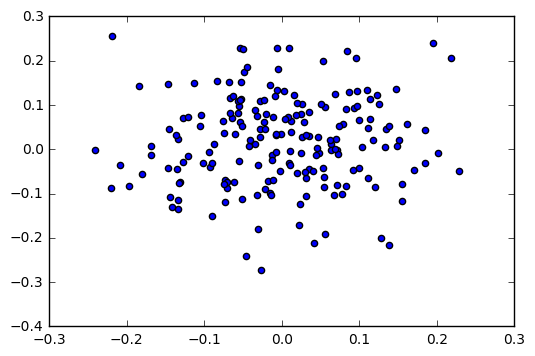

In [23]:
plt.scatter(x, y)

## Conclusion

Python 3: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.
Python 2: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.

# Real Data

In [24]:
behav_data_f = 'Phenotypic_V1_0b_preprocessed1.csv'

In [25]:
df = pd.read_csv(behav_data_f)
df = df.loc[df['func_perc_fd'].notnull(), :]
df = df.loc[df['FILE_ID']!='no_filename', :]
df['AGE_YRS'] = np.floor(df['AGE_AT_SCAN'])
df.head()

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,24.0
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,19.0
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0,13.0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1,13.0
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,...,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1,17.0


In [26]:
nsubs = 100
start1 = 0
start2 = 100
for i, (sub, f_id) in enumerate(df.loc[start1:(start1+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1 = np.empty([corr_mat.shape[0], corr_mat.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1 = np.nanmean(all_corr_mat1, axis=2)

for i, (sub, f_id) in enumerate(df.loc[start2:(start2+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2 = np.empty([corr_mat.shape[0], corr_mat.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2 = np.nanmean(all_corr_mat2, axis=2)

In [27]:
[all_corr_mat1.shape, all_corr_mat2.shape]

[(116, 116, 100), (116, 116, 100)]

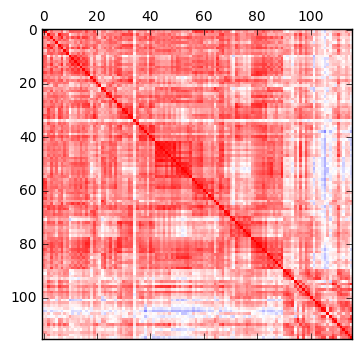

In [28]:
plt.matshow(all_corr_mat1[:,:,0], vmin=-1, vmax=1, cmap='bwr')

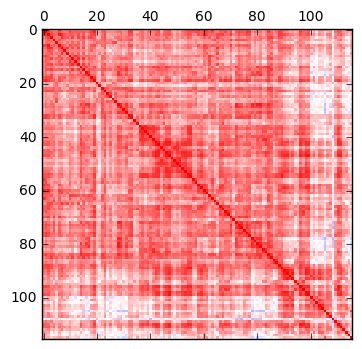

In [29]:
plt.matshow(all_corr_mat1[:,:,9], vmin=-1, vmax=1, cmap='bwr')

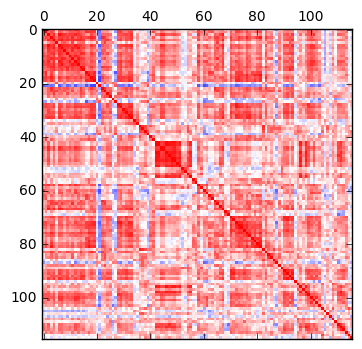

In [30]:
plt.matshow(all_corr_mat2[:,:,0], vmin=-1, vmax=1, cmap='bwr')

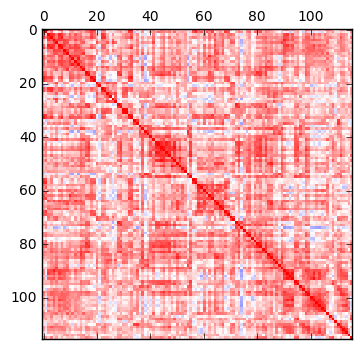

In [31]:
plt.matshow(all_corr_mat2[:,:,9], vmin=-1, vmax=1, cmap='bwr')

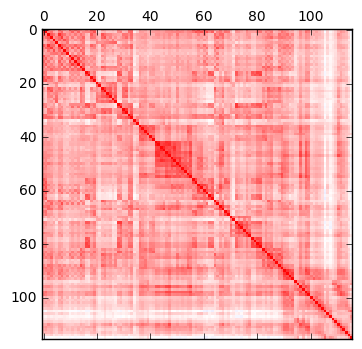

In [32]:
plt.matshow(av_corr_mat1, vmin=-1, vmax=1, cmap='bwr')

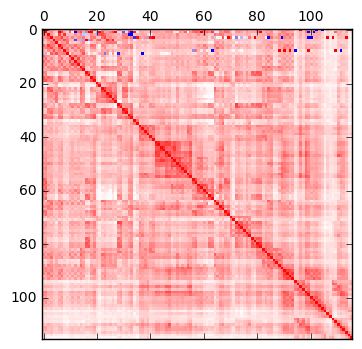

In [33]:
plt.matshow(av_corr_mat2, vmin=-1, vmax=1, cmap='bwr')

In [34]:
np.fill_diagonal(av_corr_mat1, 0)
np.fill_diagonal(av_corr_mat2, 0)

np.round([(av_corr_mat1.min(), av_corr_mat1.max()), (av_corr_mat2.min(), av_corr_mat2.max())])

array([[ -0.00000000e+000,   1.00000000e+000],
       [ -8.49422662e+295,   2.22870585e+275]])

In [35]:
np.fill_diagonal(all_corr_mat1[:,:,89], 0)
np.fill_diagonal(all_corr_mat1[:,:,66], 0)

np.round([(all_corr_mat1[:,:,89].min(), all_corr_mat1[:,:,89].max()), (all_corr_mat1[:,:,66].min(), all_corr_mat1[:,:,66].max())], 2)

array([[-0.27,  0.94],
       [-0.53,  0.93]])

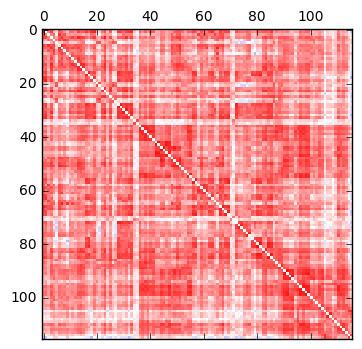

In [36]:
plt.matshow(all_corr_mat1[:,:,89], vmin=-1, vmax=1, cmap='bwr')

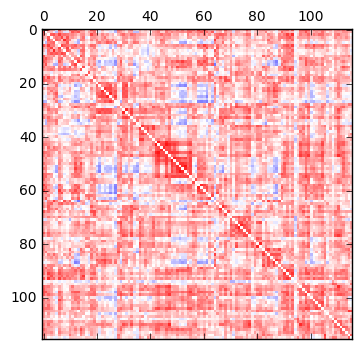

In [37]:
plt.matshow(all_corr_mat1[:,:,66], vmin=-1, vmax=1, cmap='bwr')

In [38]:
calc_rsq(av_corr_mat1, av_corr_mat2)

nan

Apparently we need to Fisher *z* transform them, which is equivalent to the arctanh function.

In [39]:
nsubs = 100
start1 = 0
start2 = 100
for i, (sub, f_id) in enumerate(df.loc[start1:(start1+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1_z = np.nanmean(all_corr_mat1_z, axis=2)

for i, (sub, f_id) in enumerate(df.loc[start2:(start2+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)
    
    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2_z = np.nanmean(all_corr_mat2_z, axis=2)

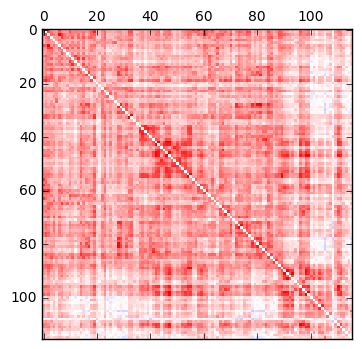

In [40]:
plt.matshow(all_corr_mat1_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

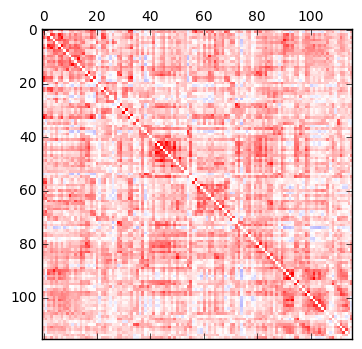

In [41]:
plt.matshow(all_corr_mat2_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

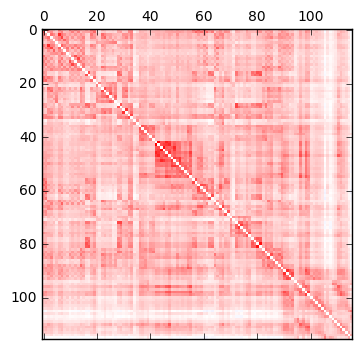

In [42]:
plt.matshow(av_corr_mat1_z, vmin=-1.5, vmax=1.5, cmap='bwr')

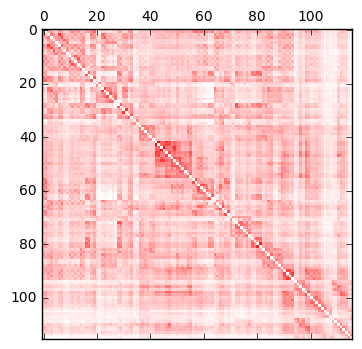

In [43]:
plt.matshow(av_corr_mat2_z, vmin=-1.5, vmax=1.5, cmap='bwr')

In [44]:
np.fill_diagonal(av_corr_mat1_z, 0)
np.fill_diagonal(av_corr_mat2_z, 0)

np.round([(av_corr_mat1_z.min(), av_corr_mat1_z.max()), (av_corr_mat2_z.min(), av_corr_mat2_z.max())],4)

array([[-0.0752,  1.6009],
       [-0.0198,  1.4522]])

In [45]:
calc_rsq(av_corr_mat1_z, av_corr_mat2_z)

0.82211375388083741

In [46]:
calc_rsq(np.random.normal(0,.0001, size=(190,190)), np.random.normal(0,.0001, size=(190,190)))

-1.0044567483675504

In [47]:
covmat = np.zeros((190, 190))
means = np.zeros(190)
np.fill_diagonal(covmat, 1)
datas1=pd.DataFrame(data=np.random.multivariate_normal(means, covmat, size=100))
datas2=pd.DataFrame(data=np.random.multivariate_normal(means, covmat, size=100))
datas1.shape

(100, 190)

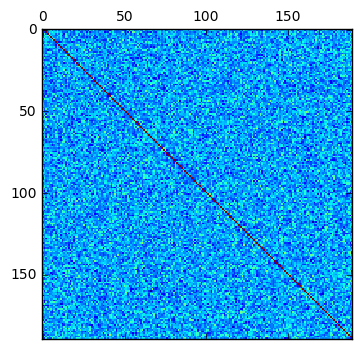

In [48]:
plt.matshow(datas1.corr())

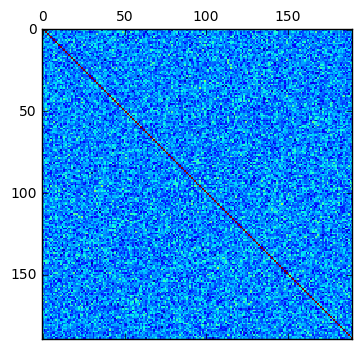

In [49]:
plt.matshow(datas2.corr())

In [50]:
calc_rsq(datas1.corr().as_matrix(), datas2.corr().as_matrix())

-0.98583595260607848

## Try out the new icc function too

In [51]:
compute_icc(datas1.corr().as_matrix(), datas2.corr().as_matrix())

0.01239847772604754

In [52]:
compute_icc(av_corr_mat1_z, av_corr_mat2_z)

0.92101435582748625